In [1]:
from google.colab import files
import zipfile
import os

# 1️⃣ Upload the ZIP file of your dataset
uploaded = files.upload()  # select Multi-class Weather Dataset.zip

# 2️⃣ Unzip the uploaded file
zip_filename = list(uploaded.keys())[0]  # get the uploaded file name
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('dataset')  # extract into 'dataset/' folder

# 3️⃣ List folders/classes inside the dataset
path = 'dataset/Multi-class Weather Dataset'  # update if your zip has subfolder
folders = os.listdir(path)
print("Class folders:", folders)


Saving Multi-class Weather Dataset.zip to Multi-class Weather Dataset.zip
Class folders: ['Sunrise', 'Rain', 'Shine', '.DS_Store', 'Cloudy']


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [6]:
# --- Image data generator with training/validation split ---
datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(128, 128),  # smaller images = faster training
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(128, 128),
    batch_size=32,
    subset='validation'
)


Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [7]:
# --- CNN Model ---
epochs = 20          # fewer epochs for ~15 min runtime
dropout_rate = 0.4   # moderate dropout
learning_rate = 0.001

inputs = Input(shape=(128, 128, 3))

x = Conv2D(16, (3,3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(dropout_rate, seed=5)(x)
x = Dense(64, activation='relu')(x)

outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [8]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"]) #mean_squared_error
model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 684ms/step - accuracy: 0.4393 - loss: 1.1355 - val_accuracy: 0.7054 - val_loss: 0.6566
Epoch 2/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 11s 427ms/step - accuracy: 0.7500 - loss: 0.4376

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.7500 - loss: 0.4376 - val_accuracy: 0.7768 - val_loss: 0.6214
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 610ms/step - accuracy: 0.7703 - loss: 0.5704 - val_accuracy: 0.7634 - val_loss: 0.6148
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8125 - loss: 0.3697 - val_accuracy: 0.7812 - val_loss: 0.5897
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 640ms/step - accuracy: 0.8777 - loss: 0.3989 - val_accuracy: 0.7679 - val_loss: 0.7424
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.7500 - loss: 0.5366 - val_accuracy: 0.8125 - val_loss: 0.6542
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 603ms/step - accuracy: 0.9125 - loss: 0.2703 - val_accuracy: 0.8170 - val_loss: 0.5266
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9375 - loss: 0.1785 - val_accuracy: 0.8214 - val_loss: 0.5518
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 631ms/step - accuracy: 0.9069 - loss: 0.2591 - val_accuracy: 0.8438 - val_

In [9]:
for key, value in model.history.history.items():
    print(f"{key}: {len(value)}")

accuracy: 20
loss: 20
val_accuracy: 20
val_loss: 20


In [10]:
# Check the lengths of all keys in the history
history_data = model.history.history
lengths = [len(v) for v in history_data.values()]

# If lengths are inconsistent, trim them to the smallest length (if needed)
min_length = min(lengths)
for key in history_data:
    history_data[key] = history_data[key][:min_length]

# Now you can create the DataFrame
results = pd.DataFrame(history_data)

In [11]:
results = pd.DataFrame(model.history.history)

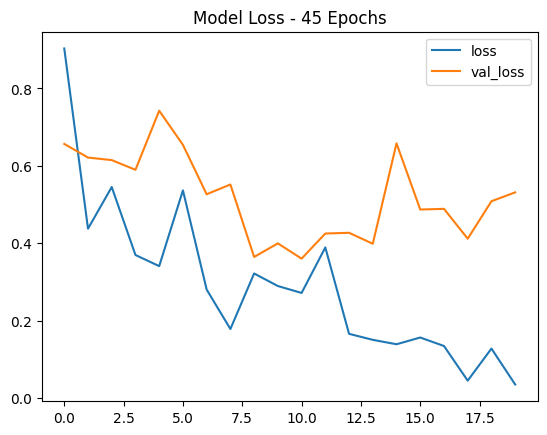

In [12]:
results[['loss','val_loss']].plot(title='Model Loss - 45 Epochs')
plt.savefig('./loss.png')

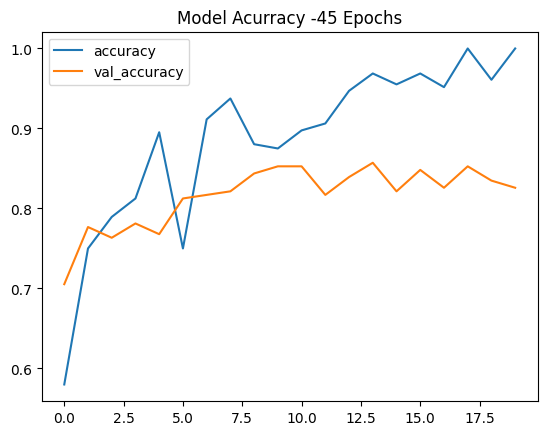

In [13]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy -45 Epochs')
plt.savefig('./accuracy.png')

In [14]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

# Validation accuracy should typically be a non-zero value between 0 and 1, representing the model's performance on a separate validation dataset.

Accuracy: 1.0, Val_Accuracy: 0.8258928656578064
Loss: 0.03521338477730751, Val_Loss: 0.5314582586288452


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step


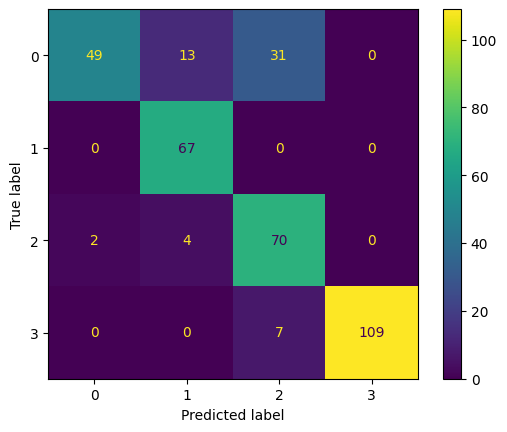

In [15]:
#collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [16]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


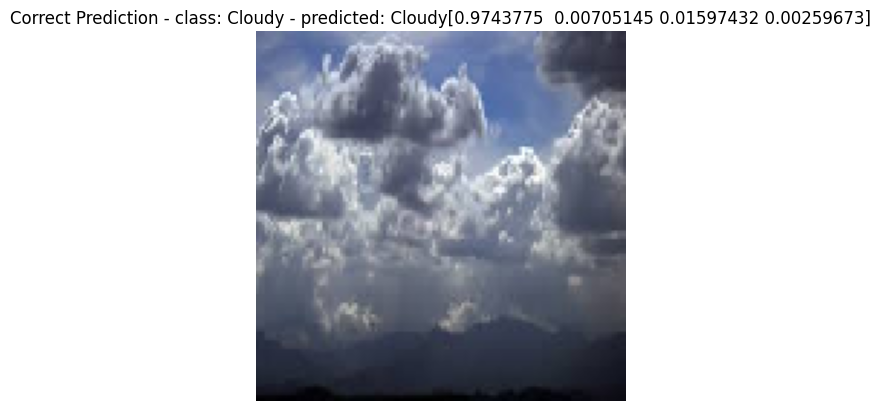

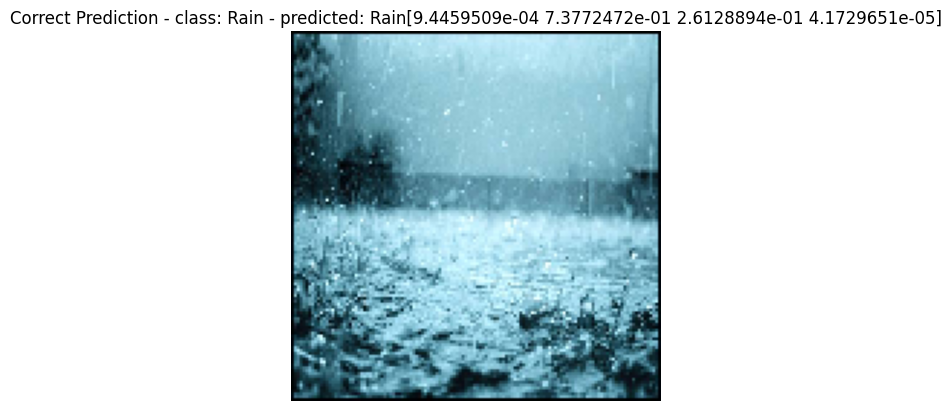

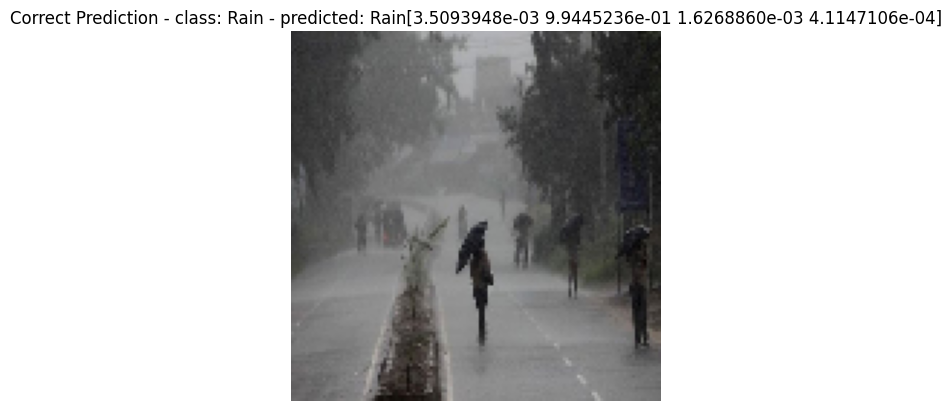

In [17]:
predict_one(model, 3) #<--you can show multiple pictures with this command. Just fill in the number you want to see.